# Laboratory practice 3 (2 sessions)



<h3 style="font-size: 20px"> Important notes: </h3>



- This .pynb file is ready for execution in a Google Colab (https://colab.research.google.com) environment. Just upload it and open it from a regular Colab session.

- If you have any question about this lab, please send an email to Carmen G. Almudever (cargara2@disca.upv.es)

- The answers of Lab 3 have to be sent by email to Carmen G. Almudever (cargara2@disca.upv.es) in case you do not attend the lab session or you do not manage to finish all exercises during the lab session. (Use the "print" menu option of the Google Colab environment to create a PDF file. Please name the file with your answers as “Lab3_student_name.pdf”)

- **Note that the deadline for sending the answers of Lab 3 is March 29.**

## Measuring Qubits and Quantum Circuits

Prerequisite 
- [Ch.1.3 Representing qubit states](http://web-sisop.disca.upv.es:8080/course/ch-states/representing-qubit-states)
- [Ch.1.4 Single Qubit Gates](http://web-sisop.disca.upv.es:8080/course/ch-states/single-qubit-gates)
- [Ch.2.2 Multiple Qubits and Entangled States](http://web-sisop.disca.upv.es:8080/course/ch-gates/multiple-qubits-and-entangled-states)


Other relevant materials
- [Feynman Lectures Ch. III - 12](https://www.feynmanlectures.caltech.edu/III_12.html)
- [Quantum Operation](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html)  


In [ ]:
# ALWAYS RUN THIS CELL AFTER YOU LOAD (OR RELOAD) THE NOTEBOOK

# Generic cell for correct operation of QCO materials in Google Colab (jcperez@disca.upv.es):
!pip -qqq install qiskit[visualization]
import qiskit
%matplotlib inline
qiskit.__version__

# Not always necessary (jcperez@disca.upv.es):
!pip -qqq install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# To fix a bug/version incompatibility in that file (jcperez@disca.upv.es):
!sed -ie 's/denominator >/denominator() >/g' /usr/local/lib/python3.8/dist-packages/qiskit/visualization/array.py

# To set graphical circuit drawing by default in qiskit (jcperez@disca.upv.es):
!mkdir ${HOME}/.qiskit 2>/dev/null
!printf "[default]\ncircuit_drawer = mpl\n" > ${HOME}/.qiskit/settings.conf

In [ ]:
#!pip install numexpr
#!pip install pylatexenc

from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, execute, Aer
from math import sqrt, pi
import numpy as np

<h2 style="font-size:24px;">Part 1: Measuring the state of a qubit</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Understand how measurements work in quantum computing. To this purspose, you will have to calculate by hand what the output measurement probabilities are for different quantum states and verify them by writting the corresponding circuit in QisKit.</p>
</div>


<h3 style="font-size: 20px"> 1. Calculate the measurement probabilities of single qubit states. </h3>



As we have seen during the lectures, by using the state vector simulator of Qiskit we can view the state of a qubit. However, in real devices this is not possible. When a qubit is measured what get is a binary value `0` or `1`. That is, we cannot read out the state superposition and obtain the $\alpha$ and $\beta$ values. 

&#128211;To have a bit more practice on what happens when a qubit is measured, let's calculate by hand the measurement probabilities of obtaining measurement result 0 and 1 for the quantum states shown below knowing that to find the probability of measuring a state $|\psi \rangle$ in the state $|x\rangle$ we do (1 point):

$$p(|x\rangle) = | \langle x| \psi \rangle|^2$$

$$
\begin{aligned}
1. |\psi_{A} \rangle & = |0\rangle \\
2. |\psi_{B} \rangle & = |1\rangle \\
3. |\psi_{C} \rangle & = \tfrac{1}{2}|0\rangle + \tfrac{\sqrt{3}}{2}|1\rangle \\
4. |\psi_{D} \rangle & = \tfrac{1}{2}|0\rangle + \tfrac{i\sqrt{3}}{2}|1\rangle 
\end{aligned}
$$


**Your answer:**

&#128211;Are the measurement probabilities for $|\psi_{C} \rangle $ and $ |\psi_{D} \rangle$ the same? If so, explain why as the quantum states are different (0,5 points). 

**Your answer:**

<h4 style="font-size: 17px">&#128211;1.1. Measuring a single qubit with Qiskit.</h4>

We will now verify the measurement probabilities previously obtained using Qiskit. To do so, you will have to initialize a qubit to each of the quantum states (first $|\psi_{A} \rangle = |0\rangle$, then $|\psi_{B} \rangle  = |1\rangle$, etc.) and show their outcome probabilites. You can use the function `initialize`.
To learn how to use it, check [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html). ( go to the `arbitrary initialization` section. ) (1 point)

In [ ]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

#### your code goes here


# Let's view our circuit
qc.draw()

We can then use the Qiskit's statevector simulator to view the resulting state of our qubit. 

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

This time, instead of the statevector we will get the counts for the `0` and `1` results using `.get_counts()`:

Note that as you are not measuring the qubits you should view the same probabilities as you have calculated by hand.

In [ ]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)


Let’s now measure our qubit as we would in a real quantum computer and see the result:

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
qc.measure_all()
qc.draw()

&#128211;Execute the code below several times (for each of the quantum states) and describe what you observe when looking at the output state (x axis) and why you observe that. Please, run it 10 times at least. (0,5 points)

Note that executing the code below several times means that we are running the circuit shown above several times in which the qubit is initilized to a specific quantum state and measured.

**Your answer:**

In [ ]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)


<h4 style="font-size: 17px">&#128211;1.2. Measuring a single qubit several times with Qiskit.</h4>

In this section we will see what happens when multiple measurements are performed in a row on a single qubit.

First, you will have to initialise your qubit to a random quantum state in superposition. 

You can directly introduce the quantum state as we did before (please, use a different one) or you can use the `arbitrary initialization` function of Qiskit.  To learn how to use the function `initialize`, check [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html). ( go to the `arbitrary initialization` section. )

In [ ]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
#### your code goes here




# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

As we did in the previous section, let’s now measure our qubit as we would do in a real quantum computer and see the result:

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
qc.measure_all()
qc.draw()

If you execute the code shown below several times you should observe a similar behaviour as for qubits $ |\psi_{C} \rangle$ and $ |\psi_{D} \rangle$ of the previous section.

In [ ]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)



Now we will initialise our qubit again to a superposition state and measure it **3 consecutive times**:

In [ ]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
#### your code goes here




# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

To measure the qubit three consecutive times execute the cell below three times (you should see three measurements in a row):

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
qc.measure_all()
qc.draw()

&#128211;If you run the code below several times, you will observe that sometimes the output is `000` and others `111`.

Why if the first measurement result is `0`(`1`) the other two measurement results are also `0`(`1`)? (1 point)

**Your answer:**

In [ ]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)


<h3 style="font-size: 20px"> 2. Calculate the measurement probabilities of multiple qubit states. </h3>



In this second part we will continue looking at the measurement but for multiple qubit states. 

&#128211;Calculate by hand the measurement probabilities for the following quantum states ( remember that $p(|x\rangle) = | \langle x| \psi \rangle|^2$) (1,25 points)

$$
\begin{aligned}
1. |\psi_{A} \rangle & = |00\rangle \\
2. |\psi_{B} \rangle & = |11\rangle \\
3. |\psi_{C} \rangle & = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{1}{\sqrt{2}}|11\rangle \\
4. |\psi_{D} \rangle & = \tfrac{1}{\sqrt{2}}|10\rangle + \tfrac{1}{\sqrt{2}}|11\rangle \\
5. |\psi_{E} \rangle & = \tfrac{2}{\sqrt{8}}|000\rangle + \tfrac{2}{\sqrt{8}}|011\rangle 
\end{aligned}
$$




**Your answer:**

<h4 style="font-size: 17px">&#128211;2.1. Create the qubit state $|\psi_{C} \rangle$ using the circuit method.</h4>

As you may have realised the qubit state $|\psi_{C} \rangle$ is one of the so-called Bell pairs. Write the corresponding circuit to create it. (0,5 points)

In [ ]:
qc = QuantumCircuit(2)
#### your code goes here




qc.draw()




As we did before we can use the Qiskit's statevector simulator to view the resulting state of our qubit. 

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

And get the counts for the `00` and `11` results using `.get_counts()`:

Note that as you are not measuring the qubits you should view the same probabilities as you have calculated by hand.

In [ ]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)


&#128211;If we measure q1 and the result is `1`. What will be the result of measuring q0 (after measuring q1)? (0,5 points)

&#128211;If we now repeat the same measurement experiment for $|\psi_{D} \rangle = \tfrac{1}{\sqrt{2}}|10\rangle + \tfrac{1}{\sqrt{2}}|11\rangle$. What will be the result of measuring q0 if we have previouly measure q1 and have got a `1`? (0,5 points)

&#128211;Is any of those states  $|\psi_{C} \rangle$ and  $|\psi_{D} \rangle$ an entangled state? Prove that by trying to write them as two separate qubit states. (0,5 points)

**Your answer:**

<h2 style="font-size:24px;">Part 2: Creating equivalent quantum circuits</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create quantum gates from other quantum gates and calculate the output state.</p>
</div>



<h3 style="font-size: 20px">&#128211; 1.Checking gate equivalences. </h3>



We know that the Hadamard transforms the states $|0\rangle$ and $|1\rangle$ to the states $|+\rangle$ and $|-\rangle$ respectively. We also know that the effect of the $Z$ gate on the states $|+\rangle$ and $|-\rangle$ is the same as that for $X$ on the state $|0\rangle$ and $|1\rangle$. From this reasoning, we find that

$$
H X H = Z,\\\\
H Z H = X.
$$

&#128211;Prove these expressions by multiplying their corresponding matrices. (0,5 points)
    
    
**Your answer:**
    

&#128211; Calculate the following expressions: (0,5 points)

$$
H X H |1\rangle = \\\\
H Z H |1\rangle =
$$





**Your answer:**

<h4 style="font-size: 17px">&#128211;1.1. Create the HXH and HZH quantum circuits.</h4>





Let's create the quantum circuits HXH and HZH and check that indeed they are equivalent to a Z and a X, respectively. Initialize the qubit to state $|1\rangle$. (0,5 points)

In [ ]:
qc = QuantumCircuit(1)
#### your code goes here




qc.draw()




In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

<h4 style="font-size: 17px">&#128211;1.2. Making a CZ from a CNOT.</h4>




&#128211;Similarly to a CNOT or Controlled-X there is a gate called Controlled-Z (also known as CZ or CPHASE) that performs a Z gate on the target qubit if the control qubit is $|1\rangle$. 
Write the quantum circuit that performs a CZ gate on two qubits. Both qubits (q0 and q1) should be initialized to state $|1\rangle$. (0,25 points)   

In [ ]:
qc = QuantumCircuit(2)

#### your code goes here



qc.draw()





Let's visualize the resulting quantum state.   

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector


&#128211;Create now a Controlled-Z gate using a CNOT gate and the gate equivalences we just saw in section 1.1. (1 point)

In [ ]:
qc = QuantumCircuit(2)

#### your code goes here






qc.draw()





Let's visualize the resulting quantum state:   

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

<h2 style="font-size:24px;">Part 3: Creating and analysing more complex quantum circuits</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Calculate the output state of a given quantum circuit and build a quantum plain adder.</p>
</div>






<h3 style="font-size: 20px">&#128211; 1.Calculating the output state of a quantum circuit. </h3>



In this exercise, we'll put all pieces together and we will calculate by hand and using the QisKit simulator the output state of a quantum circuit consisting of several qubits and gates.

&#128211;Given the following circuit, calculate by hand the output state $|q_2q_1q_0\rangle$. Note that the circle with a + symbol inside is equivalent to a X gate. (2 points)

**Tip:** The output state can be calculated by doing the matrix-vector multiplication ($|\psi_{out}\rangle$ =U$|\psi_{in}\rangle$) or by directly applying the gate transformations to the qubits (e.g. H$|0\rangle$ = $|+\rangle$ )

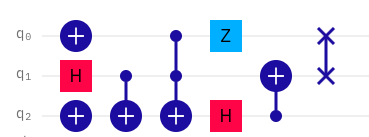


**Your answer:**

&#128211; Write the code for the quantum circuit above and get the output state by using the state vector simulator of QisKit. (1 point)

In [ ]:
qc = QuantumCircuit(3)

#### your code goes here




qc.draw()




In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

<h3 style="font-size: 20px">&#128211; 2.Creating a quantum plain adder </h3>



In Lab 1, we made our own half adder. In this exercise, we will create a quantum circuit which implements the classical addition of two-bit numbers. The quantum circuit can be implemented as a network of “Sum” and “Carry” blocks. These two blocks can be built using CNOT and Toffoli gates. We provide the truth tables of the CNOT and the Toffoli gates below:

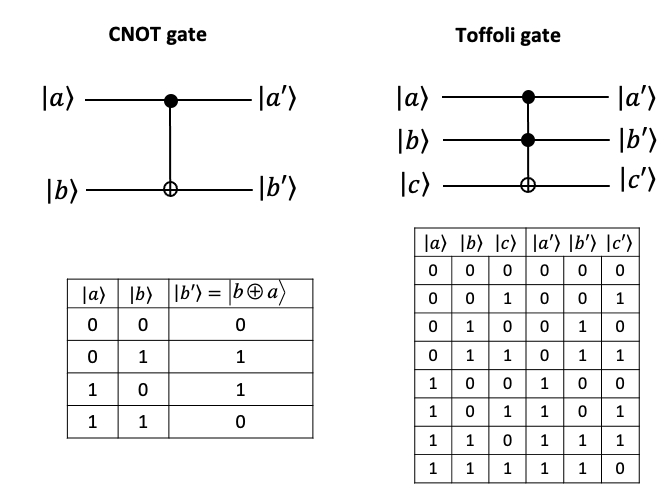



<h4 style="font-size: 17px">&#128211;2.1. The "Sum" circuit.</h4>




 &#128211; Use CNOT gates to implement the “Sum” block which sums two bits A0 and B0 (XOR addition) and stores the result in a third bit S0. In this case, we will initialize A0 to $|0\rangle$ and B0 to $|1\rangle$. Display the output quantum state by using the state vector simulator of QisKit. Display also the measurement result when measuring q2 (output S0). (1 point)
    
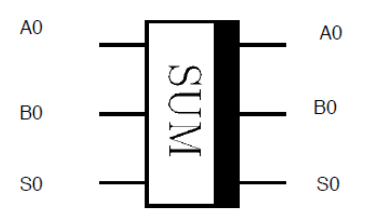

In [ ]:
# this is where your program for the SUM circuit goes
qc = QuantumCircuit(3,1) 

             
             
#initialization of qubits   


# barrier between input state and gate operation 
qc.barrier()
    
             
#gates that perfrom the addition          

    

display(qc.draw())    
  
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

 

In [ ]:
# Measuring q2 and displaying the result


# We'll run the program on a simulator
backend = Aer.get_backend('qasm_simulator')
# Since the output will be deterministic, we can use just a single shot to get it
job = execute(qc, backend, shots=1, memory=True)
output = job.result().get_memory()[0]
print(output)

<h4 style="font-size: 17px">&#128211;2.2. The "Carry" circuit.</h4>




 &#128211; The “Carry” block uses 3 inputs which are: a carry-bit C0 from the previous stage and 2 operator bits, A0 and B0. The output is stored into a fourth bit: a carry-bit C1 which can then be used on the next stage. The circuit is given in the following diagram.
    
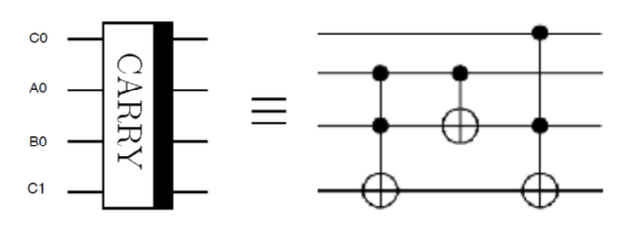


 &#128211; Use a CNOT and Toffoli gates to implement the carry block. In this case, initialize qubits C0, A0, B0 and C1 to the values $|0\rangle$, $|1\rangle$, $|1\rangle$, $|0\rangle$, respectively. (1 point)

Display the output quantum state by using the state vector simulator of QisKit. Display also the measurement result when measuring q3 (output C1).


In [ ]:
# this is where your program for the CARRY circuit goes
  
qc = QuantumCircuit(4,1) 

    
#initialization of qubits   


# barrier between input state and gate operation 
qc.barrier()
    
    
# gates that perform the Carry 


display(qc.draw())    

  
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector    
    
    

In [ ]:
# Measuring q3 and displaying the result


qc.draw()

# We'll run the program on a simulator
backend = Aer.get_backend('qasm_simulator')
# Since the output will be deterministic, we can use just a single shot to get it
job = execute(qc, backend, shots=1, memory=True)
output = job.result().get_memory()[0]
print(output)


 &#128211; Copy the previous circuit to create a new circuit “rcarry”. Modify the new circuit as following:
    
- Initialize the qubits C0,A0,B0,C1 to the state $|0\rangle$, $|1\rangle$, $|0\rangle$, $|1\rangle$, respectively.
    
- Reverse the order of the gates.

Execute the circuit “rcarry” and observe its output state. What does the “rcarry” circuit
implement? (1,5 points)


In [ ]:
# this is where your program for the RCARRY circuit goes
  
qc = QuantumCircuit(4) 

    
#initialization of qubits   


# barrier between input state and gate operation 
qc.barrier()
    
    
# gates that perform the RCarry 




display(qc.draw())    

  
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector    
    

<h4 style="font-size: 17px">&#128211;2.3. Plain 2-bits adder circuit.</h4>




 &#128211; Now we will implement a quantum plain adder for addding two 2-bit numbers. To this purpose, we will use the two blocks implemented in sections 2.1 and 2.2 based on the following generic 4-bits adder diagram shown in the next figure. The circuit starts with a gate sequence that initializes the bits of the adder’s operators: A ($a_1a_0$) and B ($b_1b_0$). In this case, we initialize A to the binary value “10” and B to “01”. The “sum” and “carry” blocks should be implemented as many times as required. (2,5 points)

Display the output quantum state by using the state vector simulator of QisKit. Display also the measurement result of the qubits that correspond to the addition output.
 


    

Notes:
    
- Measure the corresponding qubits at the end of the circuit to see the result of the addition.
    
- Note that both the carry/sum and the reverse carry (black part on the left of the block) are used in the plain adder. 
    
- Finally, note that the CNOT gate between the bottom Carry and Sum blocks is required.



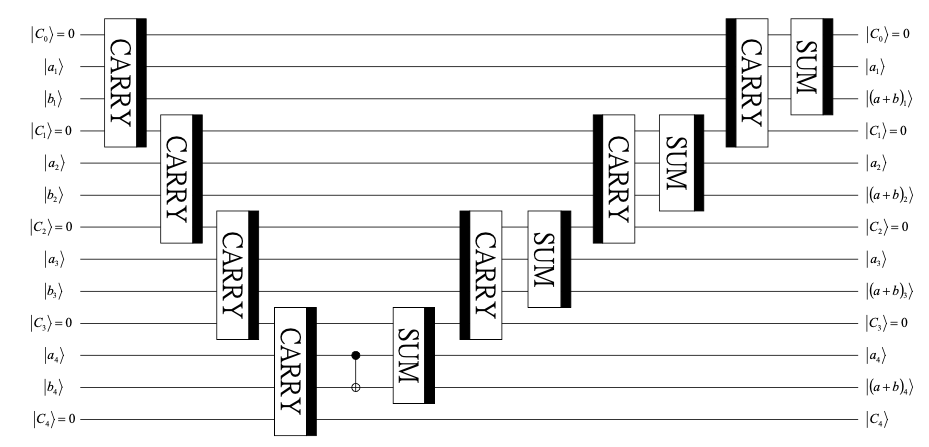

In [ ]:
## Your code goes here

# This is where your program for the plain 2-bits adder circuit goes
  
qc = QuantumCircuit(7,2) 
qc.reset(range(7))

## Initialise the operands




qc.barrier()

## carry, CNOT, Sum and rcarry blocks









display(qc.draw())    
  


backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
# Let's display the output state vector
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector 



In [ ]:
# Measuring qubits and displaying the result of the addition


qc.draw()

# We'll run the program on a simulator
backend = Aer.get_backend('qasm_simulator')
# Since the output will be deterministic, we can use just a single shot to get it
job = execute(qc, backend, shots=1, memory=True)
output = job.result().get_memory()[0]
print(output)


 &#128211; Why is a CNOT required between the last CARRY block and the first SUM block? And why is a reverse carry block needed? (1 point)


